# Salary assignment
------------
## Umuzi assignment: Predicting salaries differences
------------
### Johan Khanye(JoJo).

In [2]:
#importing cell
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import scipy as sc
from scipy import stats
import pylab as py #the package.
import seaborn as sns#Seaborn to plot our density plot over the histogram. 

In [4]:
#read/import our CSV file via pandas.

spread = pd.read_csv("salary.csv")
spread

,?salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


### Question 1- a.
* We have **514 returns/respondents** from the survey, We have **one unspecified(NaN) insert** in our data which is _(row 208, column 0)_ and there are **no blank/empty spaces**, unanswered questions in our data.

In [3]:
#To find out the number of respondents in our dataframe 'salary' 
print(str(len(spread)) + ' Respondents')

514 Respondents


In [4]:
#To find out which column&row in our dataframe is undefined;
missing = np.where(pd.isnull(spread)) 
print(missing)

(array([208], dtype=int64), array([0], dtype=int64))


In [5]:
#To find out which column&row in our dataframe is missing/blank space;
blank = np.where(spread.applymap(lambda x: x == ''))
print(blank)

(array([], dtype=int64), array([], dtype=int64))


### Question 1-b.
--------------
#### Maximum and Minimum salary.
--------------

* The Lowest recorded income in our dataframe is **R96 156.00** and the highest recorded salary is **R29 000.00**.

In [6]:
#To find out largest and smallest pay checks
salary = spread['?salary']
print("Highest salary in our dataframe is: R"+str(max(salary)))
print("Lowest salary in our dataframe is: R"+str(min(salary)))

Highest salary in our dataframe is: R96156.0
Lowest salary in our dataframe is: R29000.0


### Question 1-c.
-----------
#### Mean of salary
-------------

* The mean salary of the sample is **R50863.22009783625** and I calculate my Standard Error binary, manually and using scipy, my **Stardard error(SE) using _scipy_ is  _NaN_** and **The SE manually is _558.9715980665014_.**

In [7]:
#To find the mean we'll use the numpy callable function **mean()**.
mean=np.mean(salary)
print("Mean/Average salary : R"+str(mean))

Mean/Average salary : R50863.22009783625


In [8]:
#To calculate our SE, because our dataframe consists of a **NaN** we'll do it manually and with the scip function **sem**
#Calculating the SE manually.
s = np.std(salary)
SE= s / (np.sqrt( 514 ))
print("Standard Error(manually) is: "+str(SE))

Standard Error(manually) is: 558.9715980665014


In [9]:
#Calculating the SE with scipy.
SE_sc = stats.sem(salary)
SE_sc
print("Standard Error(Scipy) is: "+str(SE_sc))

Standard Error(Scipy) is: nan


### Question 1-d.
----------
#### Years Worked Standard deviation.
-----------
*  The standard deviation of the years worked is **_9.435503224576872_**, this indicates that the data points(years worked) are **spread/different out over a wider range of years**.

In [10]:
#we'll calculate the std deviation by 
yearsw = spread['yearsworked']
workstd = np.std(yearsw)
print(" Standard Deviation: "+str(workstd))

 Standard Deviation: 9.435503224576872


### Question 1-e.
----------
#### Median Salary.
---------

* The median alary for our data is the **_NaN_** value. The median for the data that does not contain the **_Nan_** value is **_R50096.0c_**.

In [11]:
#To calculate the sample's median salary we'll use the numpy's median method.
salarymedian = np.median(salary)
salarymedian

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

in the case that the Nan value causes problems in our data let's drop it and calculate the median again.

In [12]:
salaryfree = salary.drop(salary.index[208])
#to check whether *Nan* is gone
nangone = np.where(pd.isnull(salaryfree)) 
print(nangone)
#nan is gone, we calculate the median.
salfrmed = np.median(salaryfree)
print("The median is: R"+str(salfrmed)+"c")

(array([], dtype=int64),)
The median is: R50096.0c


### Question 1-f.
--------------------
#### Interquartile range
------------

* The interquartile range of the salaries is **_20345.0_**, this means that the within the lower quartile and the upper-quartile are not that far apart from the median.


In [15]:
#to calculate the IQT ou salaries we'll use scipy's method *iqr
salaryiqr = sc.stats.iqr(salaryfree)
print("The inter-quartile range is: "+str(salaryiqr))

The inter-quartile range is: 20345.0


### Question 1-G.
---------
#### Gender
------------
* The Survey was conducted on 386 Males and 128 Females summing the Total to 514 employees, this shows that males are more likely to become CEOs than females are. Males are 2 times more likely to be employed.

In [16]:
#To calculate the number of males and females
gender = spread[['male']] # 
gender
males = pd.value_counts(spread['male'].values)[1]
females = pd.value_counts(spread['male'].values)[0]
print('There are: '+str(females))
print('There are: '+str(males))

There are: 128
There are: 386


In [17]:
#to visualise the findings in a table we'll use a Dataframe
#Create lists to include in dictionary.
gender = ['Male', 'Females']
number = [males, females]
#Create a dictionary
genderd = {"Gender":gender, "Number":number}
table = pd.DataFrame(genderd)
table

,Gender,Number
0,Male,386
1,Females,128


### Question 1-H.
----------
#### Professional rank.
--------------
* The number of Females who are full fledged proffesionals is **_19 personel of 128_**, which is **_9.375%_** of the total number of females.
* The number of Males who are full fledged proffesionals is **_192 personel of 386_**, which is **_49.74%_** of the total number of females.
* Total number of professionals is: 211(Males and Females)
* Females make up approx. **_9%_** of the total number of profesional, whilst Males make up the remaining **_91%_** of the Professionals.

In [18]:
#we'll extract the whole female dataframe from spread then extract the female pros.
#To extract the female dataframe
femaled  = spread[spread.male == 0]
#Female extraction complete!!!, what's the highest rank the dataframe???
highposition = spread['position'].values
#From our method above 3 is the highest position.
# calculate position 3 in the female dataframe.
proffemmes = femaled[femaled.position == 3]
#print analysis.
fl = len(proffemmes)
print("There are: "+str(len(proffemmes))+" Fully Professional Females")
#Calculate percentage
pf = (12/128)*100
print("Percentage of professional women is: "+str(pf)+"%")

There are: 19 Fully Professional Females
Percentage of professional women is: 9.375%


In [19]:
maled  = spread[spread.male == 1]
#extract male proffesionals from dataFrame
profmale = maled[maled.position == 3]
#print analysis.
ml = len(profmale)
print("There are: "+str(len(profmale))+" Fully Professional Males")
#Calculate percentage
pm = (192/386)*100
print("Percentage of professional men is: "+str(pm)+"%")

There are: 192 Fully Professional Males
Percentage of professional men is: 49.740932642487046%


In [20]:
#Calculate propotion of male and female.
tl = ml+fl
#Total number of Proffesionals
print("Total number of professionals is: "+str(tl))
#Propotion
mp = (ml/tl)*100
fp = (fl/tl)*100
#Print propotion
print("Females make up "+str(fp)+"% of the profesional, whilst males make up "+str(mp)+"% of the professionals")

Total number of professionals is: 211
Females make up 9.004739336492891% of the profesional, whilst males make up 90.99526066350711% of the professionals


### Question 1-I.
----------
#### Histogram of Salary
-----------
* Below is the histogram of the Salary Variables

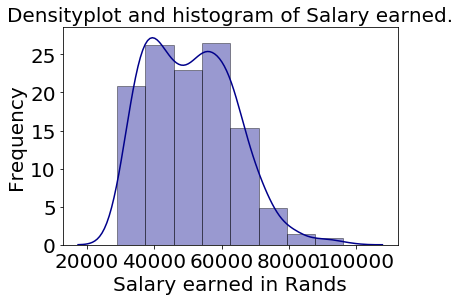

In [21]:
#plotting
sns.distplot(salaryfree, hist=True,bins=8, color = 'darkblue',hist_kws={'edgecolor':'black'})
plot.title('Densityplot and histogram of Salary earned.',fontsize=20)
plot.xlabel("Salary earned in Rands",fontsize=20)
plot.ylabel("Frequency",fontsize=20)
plot.xticks(fontsize=20)
plot.yticks([0.000000,0.000005,0.000010,0.000015,0.000020,0.000025],("0","5","10","15","20","25"),fontsize=20)
plot.show()

### Question 1-J.
------------
#### Findings of histogram
-------------
* The Distribution is Right-Skewed. meaning That Most of the The respondents earn a Salary that is very close to median salary and some of them earn a salary that is greater than the meadian thus setting their distribution be skewed towards the right. 

### Question 1-K.
---------------
#### Bargraph of average salaries.
----------------
* From the bar graph below we can tell from the **overlap of the error bars** that there is a **bit significant difference** between the male and female salary but since the average salary bar-graph shows that **average males receive more salary than Females** we can conclude and say than more **_males earn More salary than females_**.  

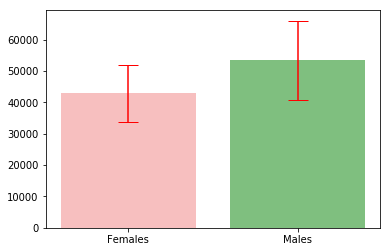

In [22]:
#get male data withou nan value.
malesa = maled['?salary']
maleV = malesa.drop(malesa.index[208])
#Calculate average of Male salaries.
maleV = np.average(maleV) #this is average male salaries

#calculate average of female salaries.
femmesa = femaled["?salary"]
femmeV = np.average(femmesa) #this is average female salaries.
#now!! for the error bars.
femmestd = np.std(femmesa)
malestd = np.std(malesa)
error = [femmestd, malestd]
labels = ['Females', 'Males']
counts = [femmeV, maleV]
color = [ 'lightcoral','green',]
#plot bar-graph with error bars.
plot.bar(labels, counts, yerr=error,alpha=0.5, ecolor='red', capsize=10, color=color)
plot.show()

### Question 1-L.
-------------
####  Relationship Scatter plot (Salary and years worked)
------------
* From tthe scatter plot we can clearly see that there is a possitive relationship between the salary earned and years meaning that the number of years worked increases, the amount of the salary earnered also increase not directly propotionally but they increase when the other one increases, the trend line clealy shows the trend in which the points follow which is with more years comes more salary.

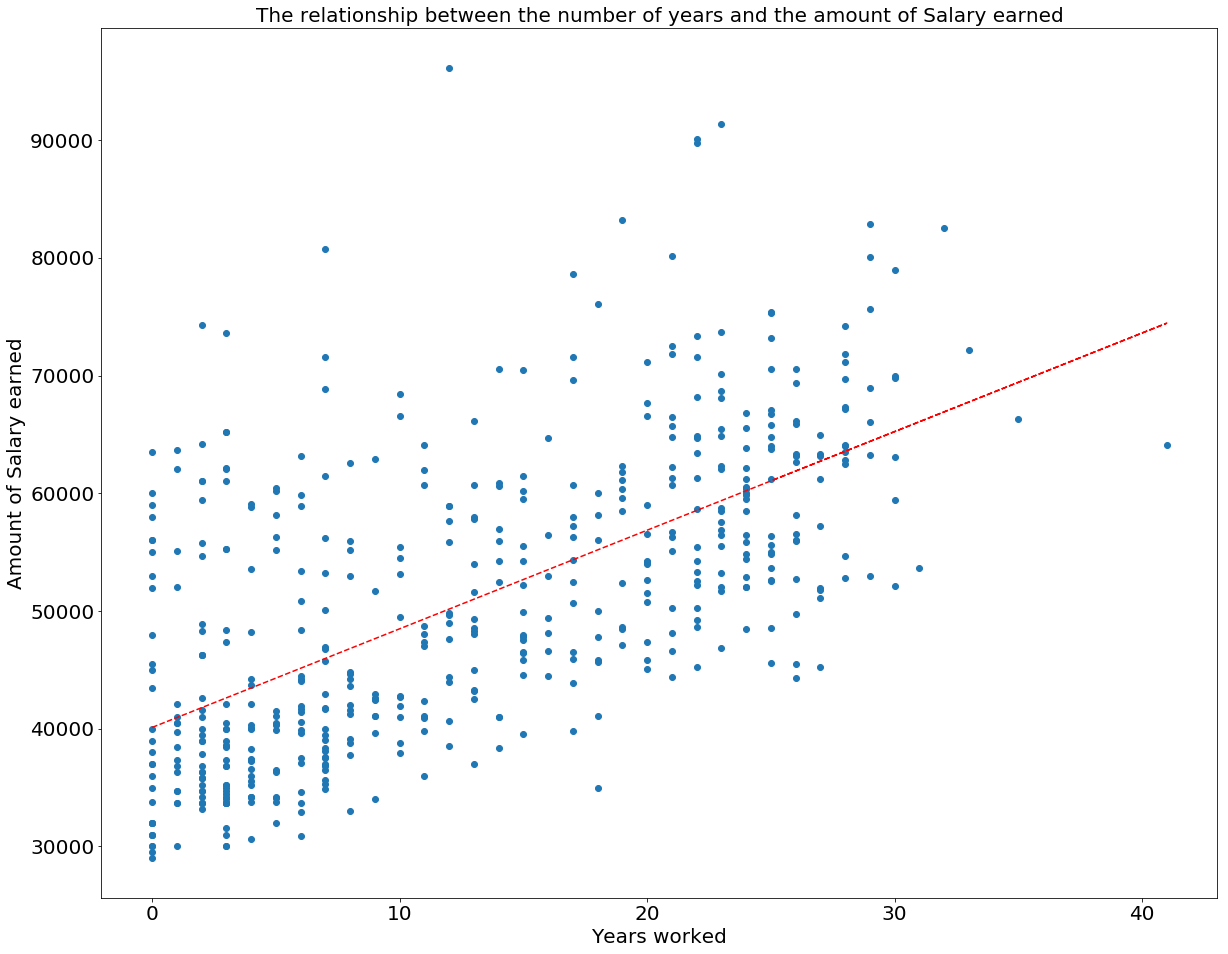

In [23]:
#Extract the years worked and drop the nan value
yearsnan = spread['yearsworked']
year = yearsnan.drop(yearsnan.index[208])
#plot your graph using **salaryfree** and your **years** data
x = year #Put the independent variable(years) on the x-axes
y = salaryfree #Dependent variable on the y-axes
plot.rcParams['figure.figsize'] = (20,16)
#To add a trendline we need the **pylab** package. 
py.plot(x,y,'o');
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plot.xlabel("Years worked",fontsize=20)
plot.ylabel("Amount of Salary earned",fontsize=20)
plot.title("The relationship between the number of years and the amount of Salary earned",fontsize=20)
plot.yticks(fontsize=20)
plot.xticks(fontsize=20)
py.plot(x,p(x),"r--")
# the line equation:
plot.show()

### Question 1-L.
------------
#### 1.	Describe any patterns in the scatterplot. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)
---------------
*  **Answer:** There is actually a  pattern to the distribution of the data, the pattern is actually binary, the first pattern is that when the number of years increase the salary paid to the employees increases too, and second pattern is that in a year the salary paid to them might increase indirectly meaning that as the number of years increases the salary paid increases 3 times than the average. The scatter plot also consists of outliers, these values do not fit into the trend such as the above R90000 salary and the individual who worked over 40 years but is still in the meadian.

### Question 1-M.
--------------
#### Pearsonr function calculate Coefficient.
-----------
* 

In [32]:
coeffient = sc.stats.pearsonr(x, y)
print("coeffient & P-value(respectively) ="+str(coeffient))

coeffient & P-value(respectively) =(0.6235888657598045, 1.2873351342921916e-56)


##### From the coefficient we can cleary tell that the number of years worked and the amount of salary earned are Moderately positvely Correlated/related meaning that these two have a relationship which is as the other increases the other one increases too although their relationship is moderate, this means that they don't increase directly propotional.

* The relationship between the salary earned and number of years worked is not statically significant. 